In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
df.head(10)

/tmp/ipykernel_33/1968603735.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


In [145]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [146]:
df[['Category','Qty','currency', 'Amount']]
df1=df[['Category','Qty']]

In [147]:
grouped_df = df.groupby('Category').agg({'Qty': 'sum'}).reset_index()

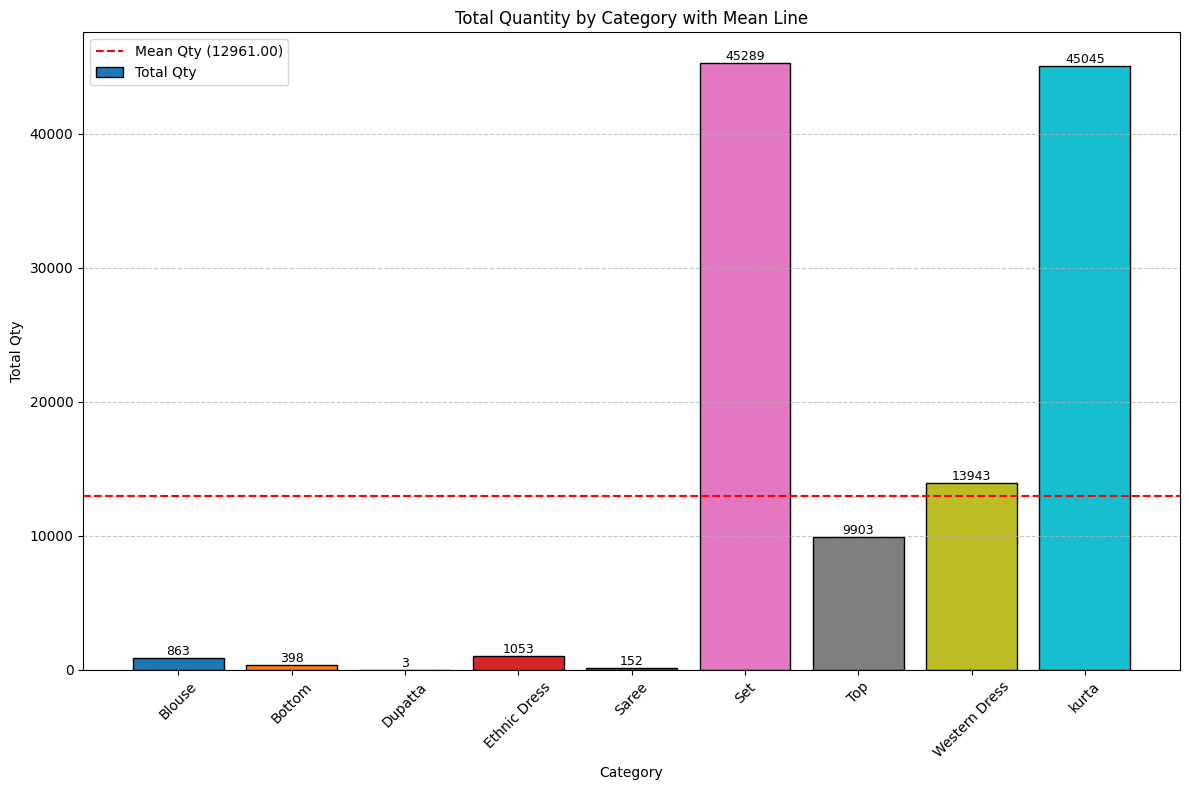

In [148]:
mean_qty = grouped_df['Qty'].mean()

# Define colors for the bars
colors = plt.cm.tab10(np.linspace(0, 1, len(grouped_df)))

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot with multicolored bars
bars = plt.bar(grouped_df['Category'], grouped_df['Qty'], color=colors, edgecolor='k', label='Total Qty')

# Add a horizontal line for the mean quantity
plt.axhline(y=mean_qty, color='r', linestyle='--', label=f'Mean Qty ({mean_qty:.2f})')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}', ha='center', va='bottom', fontsize=9, color='black')

# Labels and title
plt.xlabel('Category')
plt.ylabel('Total Qty')
plt.title('Total Quantity by Category with Mean Line')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Sets and kurtas are the highest sold clothing items followed by western dresses and tops.

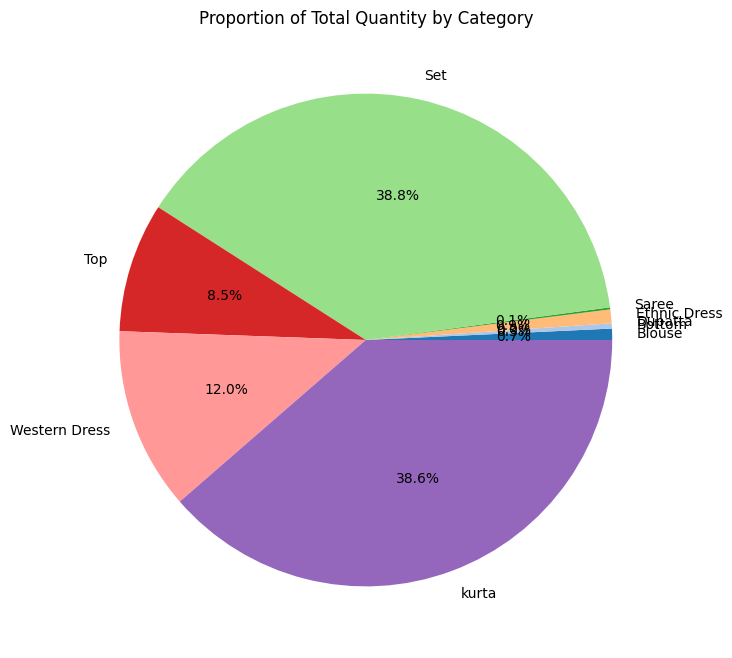

In [149]:
# Plotting
plt.figure(figsize=(8, 8))

# Pie chart
plt.pie(grouped_df['Qty'], labels=grouped_df['Category'], autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors)

# Labels and title
plt.title('Proportion of Total Quantity by Category')

# Show plot
plt.show()

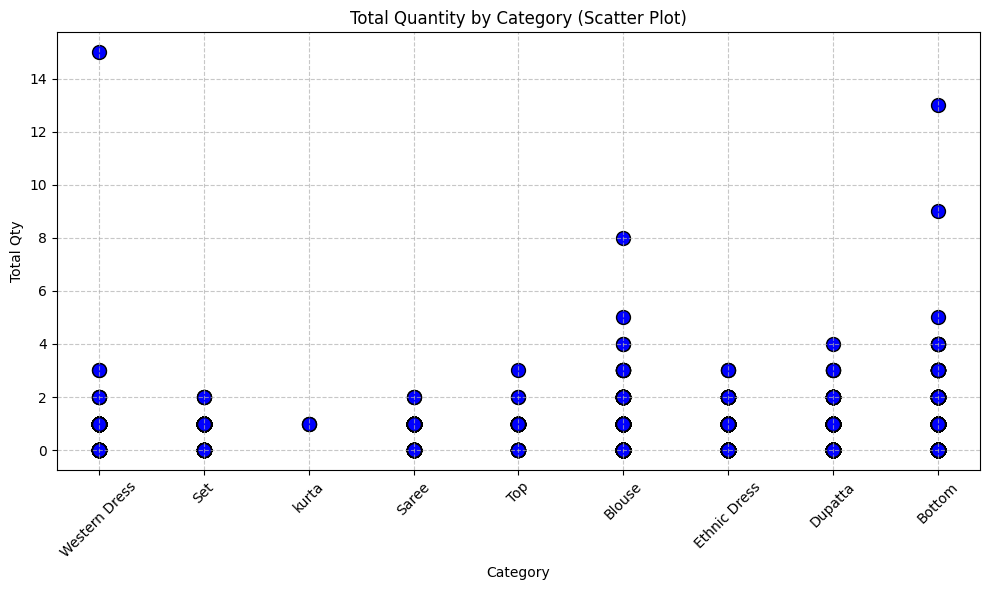

In [150]:
df['CategoryCode'] = df['Category'].astype('category').cat.codes
df['StateCode'] = df['ship-state'].astype('category').cat.codes

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with numeric codes for categories
plt.scatter(df['CategoryCode'], df['Qty'], color='blue', edgecolor='k', s=100)

# Adjust x-ticks to show category labels
plt.xticks(ticks=df['CategoryCode'].unique(), labels=df['Category'].astype('category').cat.categories, rotation=45)

# Labels and title
plt.xlabel('Category')
plt.ylabel('Total Qty')
plt.title('Total Quantity by Category (Scatter Plot)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [151]:
df1.isnull().sum()

Category    0
Qty         0
dtype: int64

In [152]:
df2=df[['ship-state','Qty']]

In [153]:
grouped_df = df2.groupby('ship-state').agg({'Qty': 'sum'}).reset_index()
grouped_df.head(50)

,ship-state,Qty
0,ANDAMAN & NICOBAR,226
1,ANDHRA PRADESH,4819
2,APO,0
3,AR,1
4,ARUNACHAL PRADESH,130
5,ASSAM,1483
6,Arunachal Pradesh,2
7,Arunachal pradesh,2
8,BIHAR,1847
9,Bihar,27


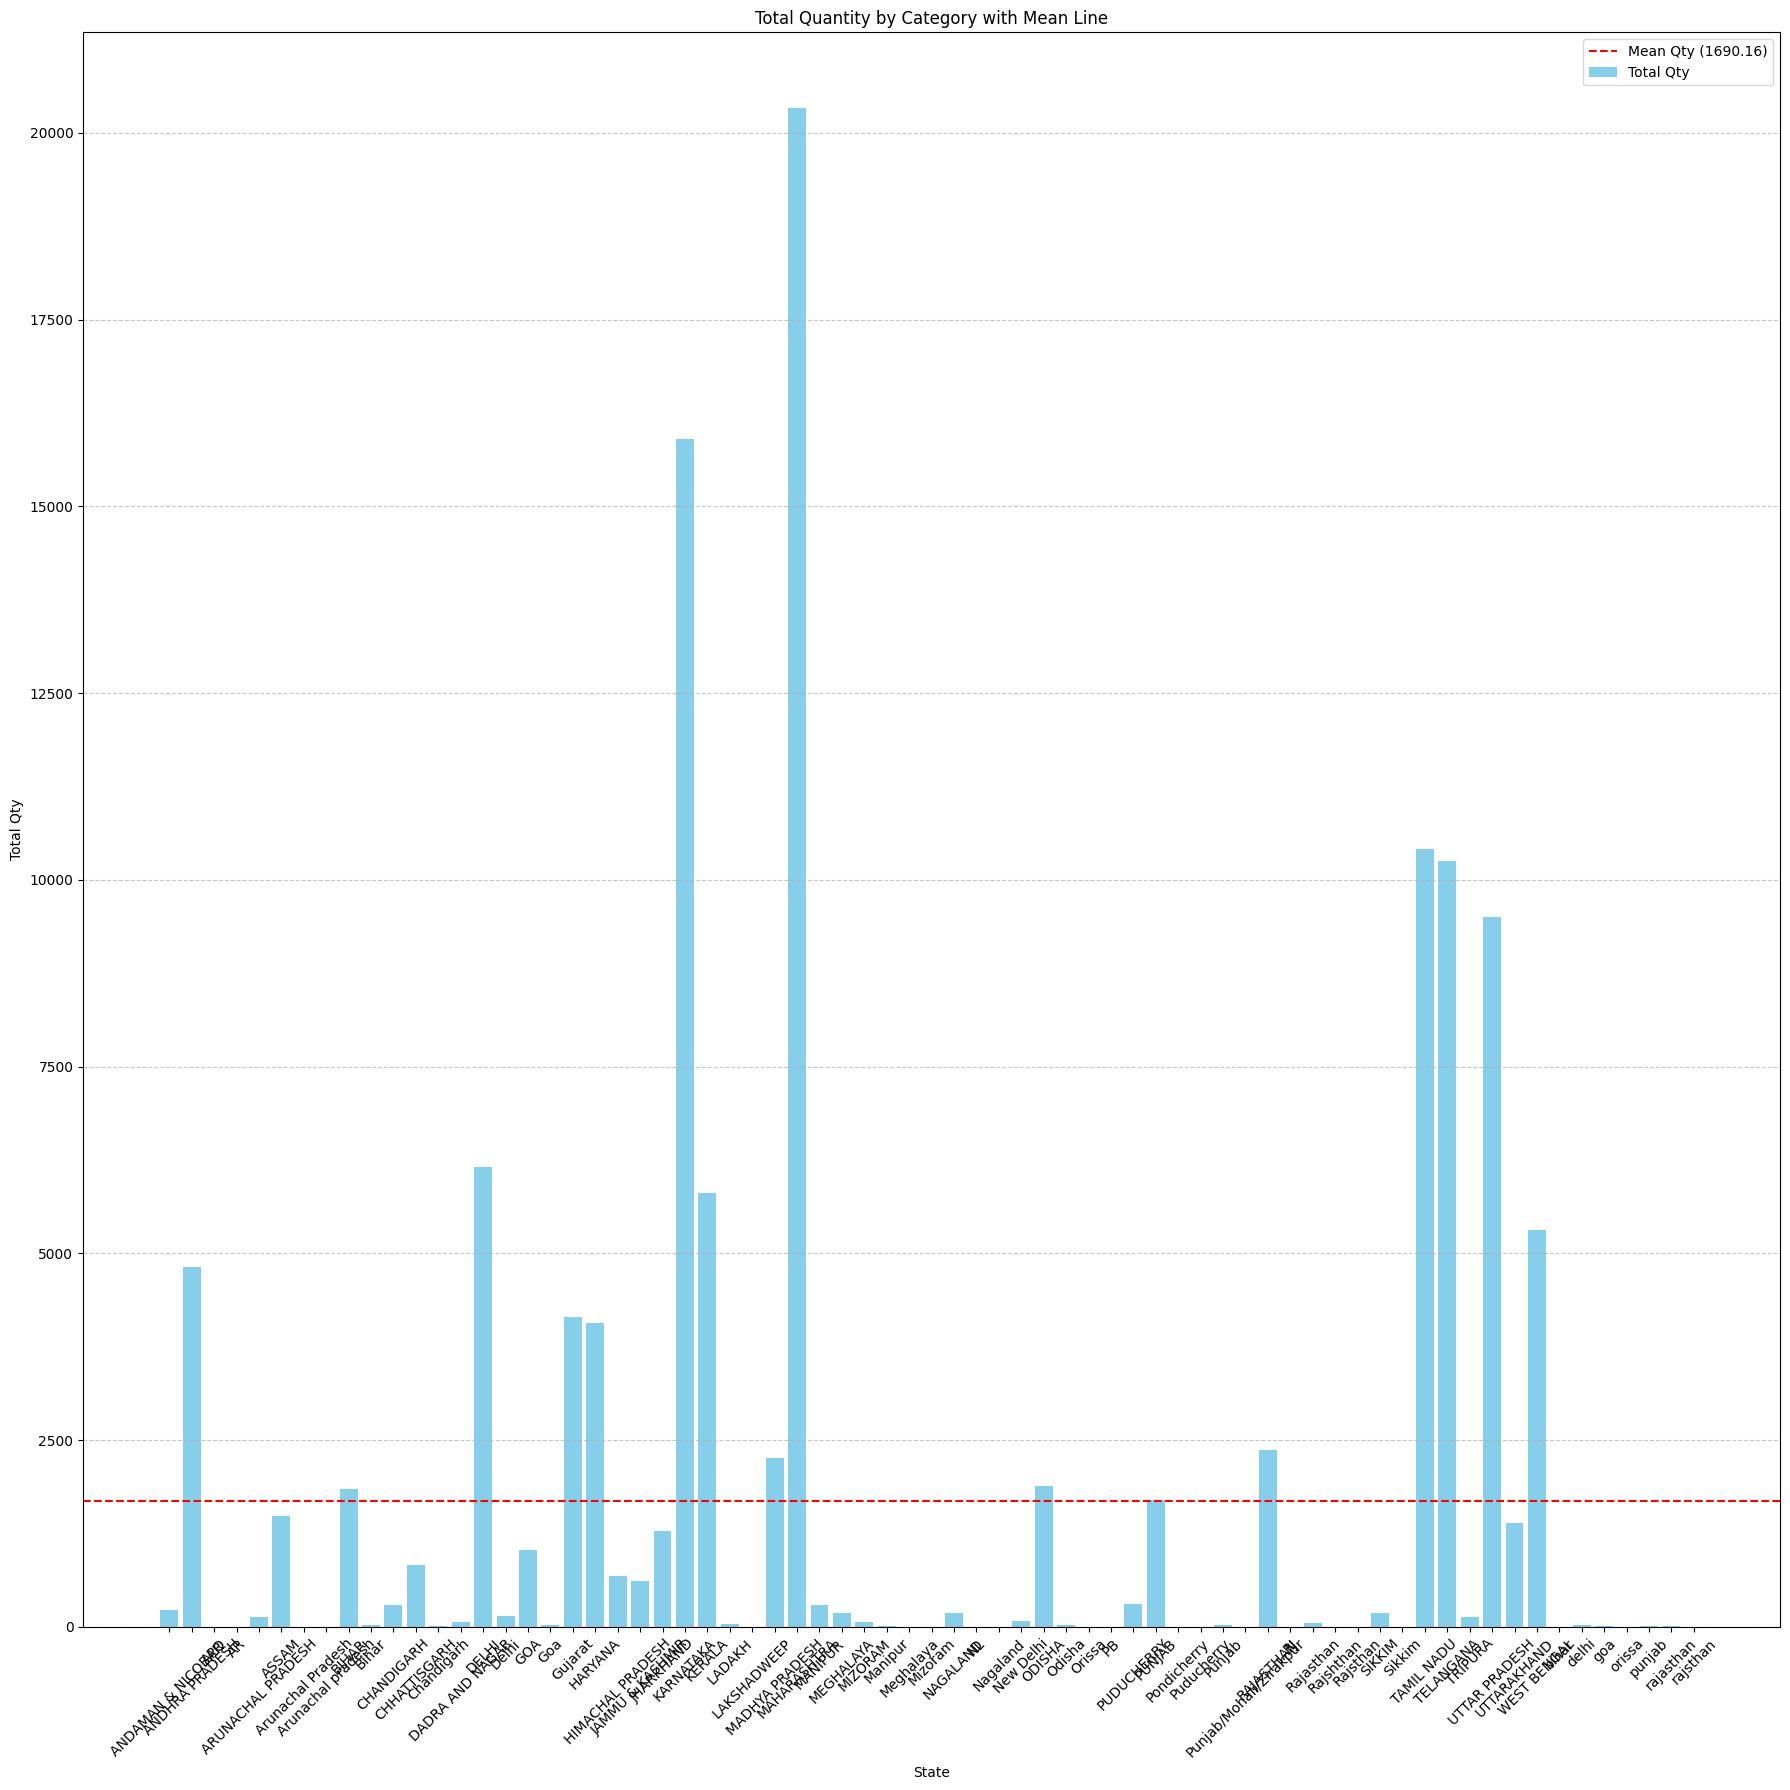

In [154]:

mean_qty = grouped_df['Qty'].mean()
plt.figure(figsize=(18, 18))

plt.bar(grouped_df['ship-state'], grouped_df['Qty'], color='skyblue', label='Total Qty')
plt.axhline(y=mean_qty, color='r', linestyle='--', label=f'Mean Qty ({mean_qty:.2f})')

plt.xlabel('State')
plt.ylabel('Total Qty')
plt.title('Total Quantity by Category with Mean Line')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()

plt.show()

Maharashtra and Karnataka are the biggest contributors to product sales out of all regions.

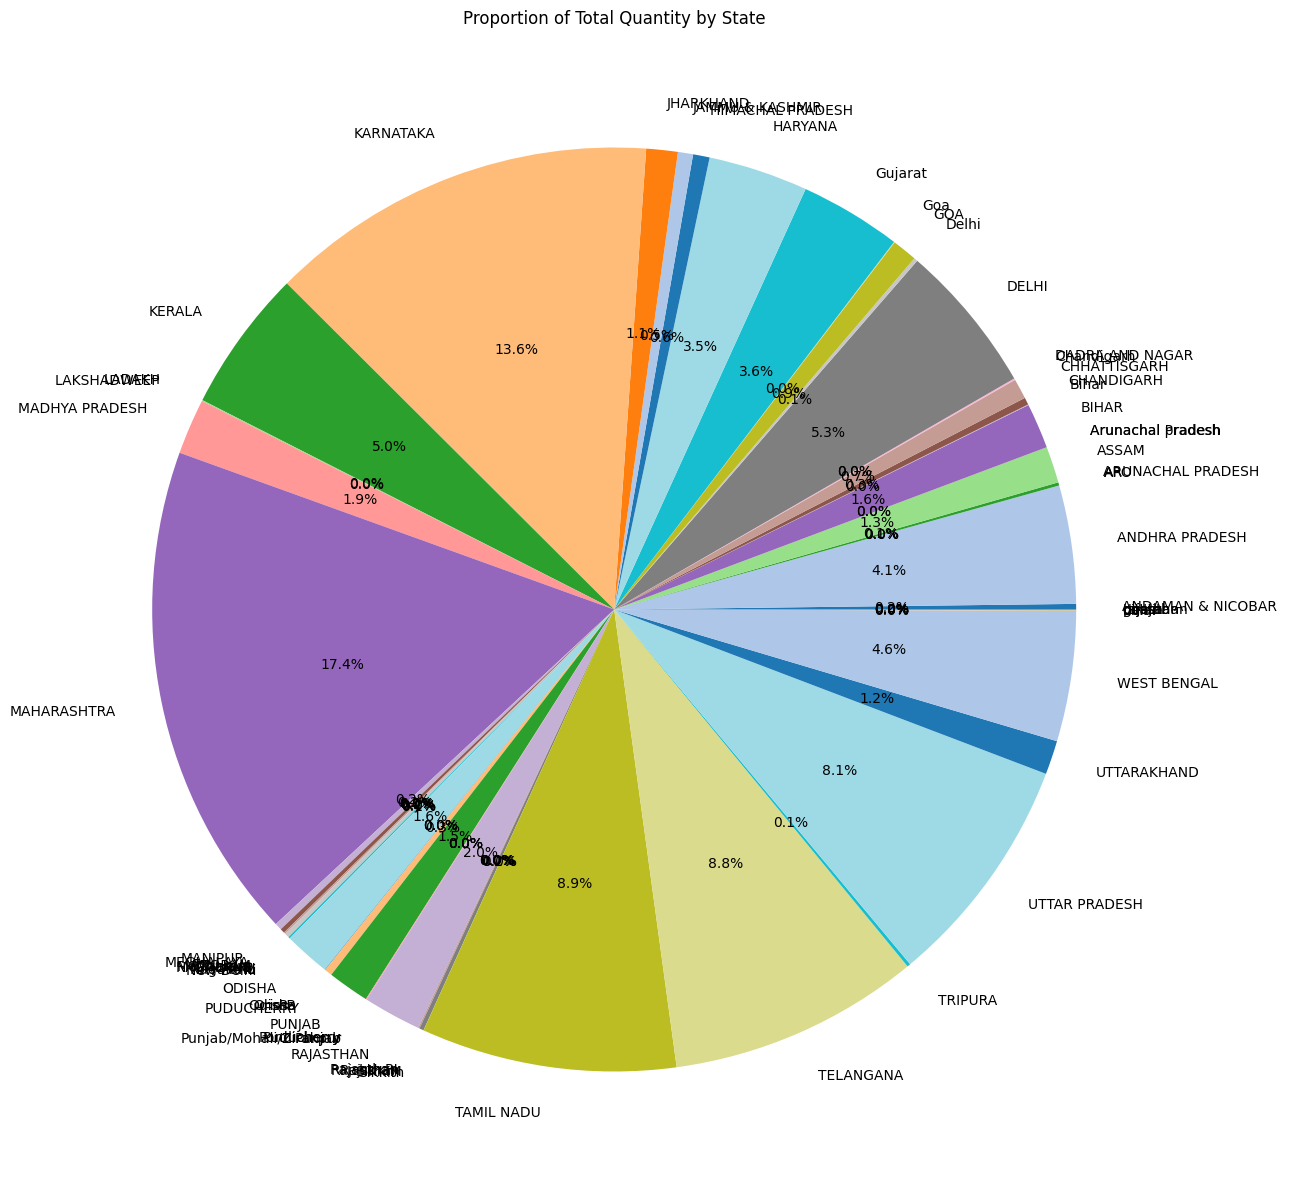

In [155]:
# Plotting
plt.figure(figsize=(15, 15))

# Pie chart
plt.pie(grouped_df['Qty'], labels=grouped_df['ship-state'], autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors)

# Labels and title
plt.title('Proportion of Total Quantity by State')

# Show plot
plt.show()

In [156]:
df3=df[['Date','Qty','Category']]
df3.head(10)

,Date,Qty,Category
0,04-30-22,0,Set
1,04-30-22,1,kurta
2,04-30-22,1,kurta
3,04-30-22,0,Western Dress
4,04-30-22,1,Top
5,04-30-22,1,Set
6,04-30-22,1,Set
7,04-30-22,1,kurta
8,04-30-22,0,Set
9,04-30-22,1,kurta


/tmp/ipykernel_33/4008558015.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Date'] = pd.to_datetime(df3['Date'])
/tmp/ipykernel_33/4008558015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])
/tmp/ipykernel_33/4008558015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['Date'].dt.month


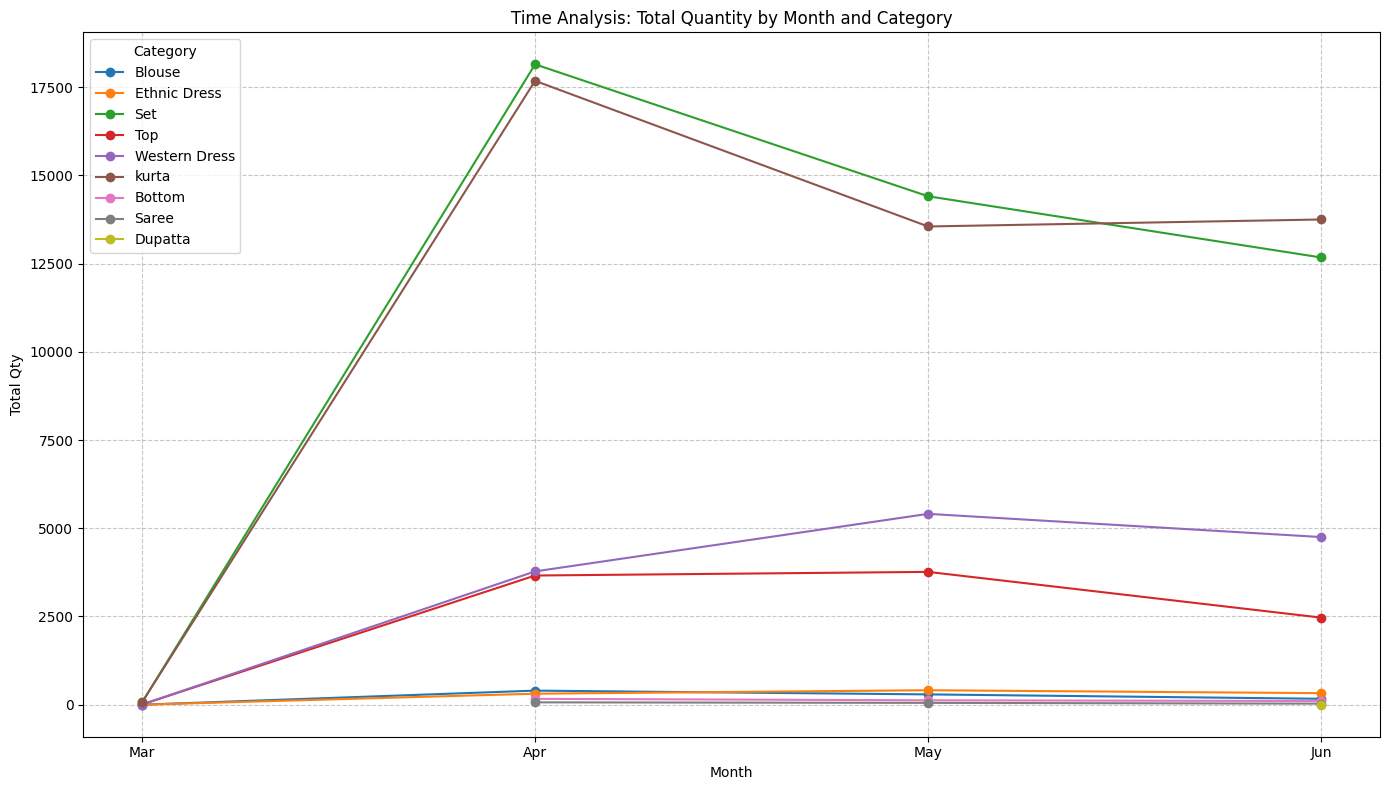

In [157]:
df3['Date'] = pd.to_datetime(df3['Date'])

# Extract month from 'Date' column and add it as a new column
df3['Month'] = df3['Date'].dt.month

# Aggregate data by month and category
monthly_data = df3.groupby(['Month', 'Category']).agg({'Qty': 'sum'}).reset_index()

# Map numeric month values to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data['MonthName'] = monthly_data['Month'].map(lambda x: month_names[x-1])

# Plotting
plt.figure(figsize=(14, 8))

# Plot separate lines for each category
for category in monthly_data['Category'].unique():
    category_data = monthly_data[monthly_data['Category'] == category]
    plt.plot(category_data['MonthName'], category_data['Qty'], marker='o', linestyle='-', label=category)

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Qty')
plt.title('Time Analysis: Total Quantity by Month and Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category')

# Show plot
plt.tight_layout()
plt.show()

The sale of sets and kurtas are correlated to each other and they peak in April. Meanwhile, tops and western dresses are sold in similar patterns throughout months and peak in May due to hot weather.

ValueError: The number of FixedLocator locations (70), usually from a call to set_ticks, does not match the number of labels (69).

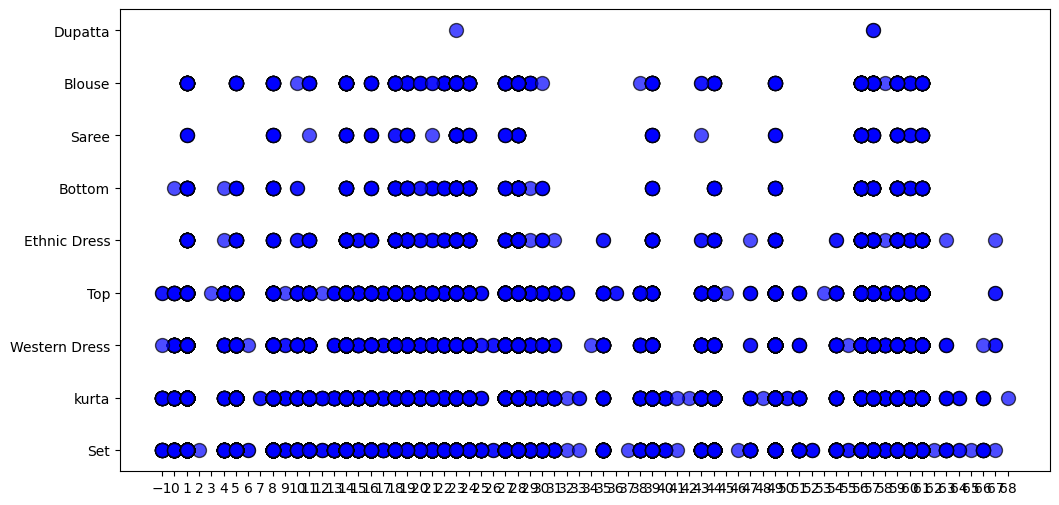

In [158]:
df['StateCode'] = df['ship-state'].astype('category').cat.codes
state_names = df['ship-state'].astype('category').cat.categories

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(df['StateCode'], df['Category'], color='blue', edgecolor='k', s=100, alpha=0.7)

# Adjust x-ticks to show state labels
plt.xticks(ticks=df['StateCode'].unique(), labels=state_names, rotation=45)

# Add annotations for each point
for _, row in df.iterrows():
    plt.text(row['StateCode'], row['Category'] + 5, f'{row["Category"]}', 
             ha='center', va='bottom', fontsize=9, color='black')

# Labels and title
plt.xlabel('Ship State')
plt.ylabel('Category')
plt.title('Category by Ship State (Scatter Plot)')
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()